# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Incorportaed datetime to determine the date of analysis
import datetime
today = datetime.date.today()

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'There is {len(cities)} in the list.')


There is 599 in the list.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get the number of sets needed in the for loop
total_set_num = (len(cities) // 50) + 1

# Set up the lists which will be used to create dataframe
city = []
lat = []
lon = []
city = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
failed_counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="

# Start to extracting cities' weather info
print('Beginning Data Retrieval')
print('-----------------------------')

for set_counter in range(total_set_num):
    
    # Use try and except block to prevent the code from stopping when the set does not have 50 records
    try:    
        
        # For each record, use openweather API to get access to all the information and append to corresponding lists
        for record_counter in range(50):
            
            # The counter represent the actual index the city is in the cities list 
            counter = set_counter * 50 + record_counter
            
            # Print the current set and record index
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')

            # Use try and except block to prevent the code from stopping when a city cannot be found
            try:
                
                # Get the query url and make a call
                query_url = url + cities[counter]
                weather_json = requests.get(query_url, time.sleep(1)).json()
                
                # Append to lists
                lat.append(weather_json["coord"]["lat"])
                lon.append(weather_json["coord"]["lon"])
                max_temp.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                country.append(weather_json["sys"]["country"])
                date.append(weather_json["dt"])
                city.append(cities[counter])
            
            # If city not found, print it out, and increment to the failed counter
            except KeyError:

                print('City not found. Skipping...')
                failed_counter += 1
            
            # (For testing)If any other error, print it out
            except:
                
                print('Unexpected Error')
    
    # Break out from the loop once the IndexError was found
    except IndexError:
        
        break
        
# Print out the number of cities found and not found
print('-----------------------------')
print(f'There are {failed_counter} cities not found. {len(cities) - failed_counter} cities in dataframe.')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | puerto escondido
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | hualmay
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | arica
Processing Record 11 of Set 1 | oksfjord
Processing Record 12 of Set 1 | mayumba
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | dalby
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | severnoye
Processing Record 22 of Set 1 | russell
Processing Record 23 of Set

Processing Record 39 of Set 4 | mahon
Processing Record 40 of Set 4 | khandagayty
Processing Record 41 of Set 4 | isakly
Processing Record 42 of Set 4 | chebarkul
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | porbandar
Processing Record 47 of Set 4 | chagda
City not found. Skipping...
Processing Record 48 of Set 4 | araouane
Processing Record 49 of Set 4 | pedasi
Processing Record 50 of Set 4 | salalah
Processing Record 1 of Set 5 | pevek
Processing Record 2 of Set 5 | trairi
Processing Record 3 of Set 5 | ust-maya
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | napasar
Processing Record 6 of Set 5 | kintampo
Processing Record 7 of Set 5 | carupano
Processing Record 8 of Set 5 | dalnegorsk
Processing Record 9 of Set 5 | san ignacio
Processing Record 10 of Set 5 | faya
Processing Record 11 of Set 5 | bismarck
Processing Record 12 of Set 5 | chadiza
Pro

Processing Record 28 of Set 8 | ballina
Processing Record 29 of Set 8 | baft
Processing Record 30 of Set 8 | post falls
Processing Record 31 of Set 8 | khartoum
Processing Record 32 of Set 8 | mount isa
Processing Record 33 of Set 8 | senno
Processing Record 34 of Set 8 | gbadolite
Processing Record 35 of Set 8 | ponta delgada
Processing Record 36 of Set 8 | krasnoarmeysk
Processing Record 37 of Set 8 | bundaberg
Processing Record 38 of Set 8 | shimoda
Processing Record 39 of Set 8 | noyabrsk
Processing Record 40 of Set 8 | rundu
Processing Record 41 of Set 8 | sao filipe
Processing Record 42 of Set 8 | rio brilhante
Processing Record 43 of Set 8 | tay ninh
Processing Record 44 of Set 8 | talca
Processing Record 45 of Set 8 | kavieng
Processing Record 46 of Set 8 | jardim
Processing Record 47 of Set 8 | ndende
Processing Record 48 of Set 8 | sandpoint
Processing Record 49 of Set 8 | iralaya
Processing Record 50 of Set 8 | seymchan
Processing Record 1 of Set 9 | bandar-e torkaman
City n

Processing Record 20 of Set 12 | djenne
Processing Record 21 of Set 12 | winnemucca
Processing Record 22 of Set 12 | kolondieba
Processing Record 23 of Set 12 | acapulco
Processing Record 24 of Set 12 | kargasok
Processing Record 25 of Set 12 | salina
Processing Record 26 of Set 12 | turiacu
Processing Record 27 of Set 12 | xam nua
Processing Record 28 of Set 12 | coacoyul
Processing Record 29 of Set 12 | plettenberg bay
Processing Record 30 of Set 12 | sabnova
Processing Record 31 of Set 12 | novopetrovskoye
Processing Record 32 of Set 12 | sayabec
City not found. Skipping...
Processing Record 33 of Set 12 | andrews
Processing Record 34 of Set 12 | siemiatycze
Processing Record 35 of Set 12 | yar-sale
Processing Record 36 of Set 12 | naze
Processing Record 37 of Set 12 | suffolk
Processing Record 38 of Set 12 | leh
Processing Record 39 of Set 12 | hai duong
Processing Record 40 of Set 12 | kupang
Processing Record 41 of Set 12 | belyy yar
Processing Record 42 of Set 12 | kailua
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the dataframe from the lists we generated from last cell
cities_dict = {'City': city,
               'Latitude' : lat,
               'Longitude' : lon,
               'Max Temperature (°C)': max_temp,
               'Humidity (%)': humidity,
               'Cloudiness (%)': cloudiness,
               'Wind Speed (MPH)': wind_speed,
               'Country': country,
               'Date': date
              }
cities_df = pd.DataFrame(cities_dict)

# Save the dataframe to a csv file
csv_path = 'output_data/cities.csv'
cities_df.to_csv(csv_path)

# Display the dataframe
cities_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,upernavik,72.7868,-56.1549,5.08,93,100,4.12,GL,1628352303
1,san patricio,28.0170,-97.5169,31.99,54,7,5.07,US,1628352237
2,puerto escondido,15.8500,-97.0667,29.46,65,1,0.00,MX,1628352306
3,mataura,-46.1927,168.8643,1.38,98,100,0.61,NZ,1628352307
4,hualmay,-11.0964,-77.6139,19.68,71,45,5.21,PE,1628352310
5,fortuna,40.5982,-124.1573,16.07,96,90,0.00,US,1628352131
6,ponta do sol,32.6667,-17.1000,26.18,80,56,2.20,PT,1628352101
7,aklavik,68.2191,-135.0107,6.00,93,90,5.14,CA,1628352257
8,arica,-18.4750,-70.3042,18.75,67,90,3.60,CL,1628352314
9,oksfjord,70.2396,22.3479,19.51,62,93,0.81,NO,1628352316


In [5]:
# Show a statistics on the dataframe
cities_df.describe()

,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.132179,18.311279,22.034604,67.890288,56.026978,3.590971,1.628353e+09
std,32.639220,92.361731,8.201845,22.284496,38.519647,2.403501,2.506957e+02
min,-54.800000,-175.200000,0.810000,6.000000,0.000000,0.000000,1.628352e+09
25%,-5.804200,-68.533725,16.605000,57.000000,19.750000,1.880000,1.628352e+09
50%,21.900000,25.280350,22.995000,73.000000,65.000000,3.135000,1.628353e+09
75%,47.757250,102.269050,27.627500,84.000000,96.000000,4.910000,1.628353e+09
max,78.218600,179.316700,46.830000,100.000000,100.000000,14.730000,1.628353e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Drop any row which has a humidity higher than 100%
cleaned_cities_df = cities_df.loc[cities_df['Humidity (%)'] <= 100]
cleaned_cities_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,upernavik,72.7868,-56.1549,5.08,93,100,4.12,GL,1628352303
1,san patricio,28.0170,-97.5169,31.99,54,7,5.07,US,1628352237
2,puerto escondido,15.8500,-97.0667,29.46,65,1,0.00,MX,1628352306
3,mataura,-46.1927,168.8643,1.38,98,100,0.61,NZ,1628352307
4,hualmay,-11.0964,-77.6139,19.68,71,45,5.21,PE,1628352310
5,fortuna,40.5982,-124.1573,16.07,96,90,0.00,US,1628352131
6,ponta do sol,32.6667,-17.1000,26.18,80,56,2.20,PT,1628352101
7,aklavik,68.2191,-135.0107,6.00,93,90,5.14,CA,1628352257
8,arica,-18.4750,-70.3042,18.75,67,90,3.60,CL,1628352314
9,oksfjord,70.2396,22.3479,19.51,62,93,0.81,NO,1628352316


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

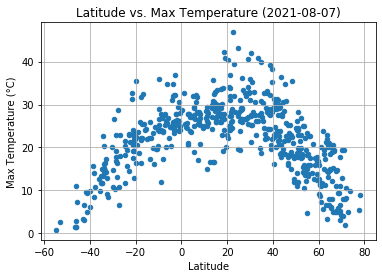

In [7]:
# Plot the scatter plot that shows the relation between latitude and max temperature, and include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', 
                       title=f'Latitude vs. Max Temperature ({today})')
plt.grid()
plt.savefig('output_data/Latitude_MaxTemperature_Plot.png')

The plot have shown that the max temperature increases as the latitude of the place approaching the interval of -20 to 20. The higher the latitude, the lower the temperature.

## Latitude vs. Humidity Plot

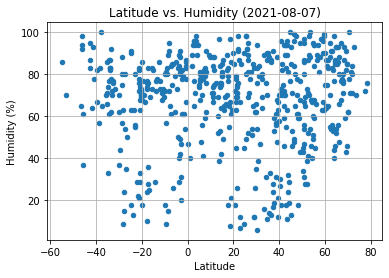

In [8]:
# Plot the scatter plot that shows the relation between latitude and humidity, and include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Latitude vs. Humidity ({today})')
plt.grid()
plt.savefig('output_data/Latitude_Humidity_Plot.png')

Most of the cities tend to have a humidity above 60%, while the humidity of those cities with latitude between 0 to 40 tends to vary more. Cities with latitude between 40 to 80 often have a humidity between 80% to 100%.

## Latitude vs. Cloudiness Plot

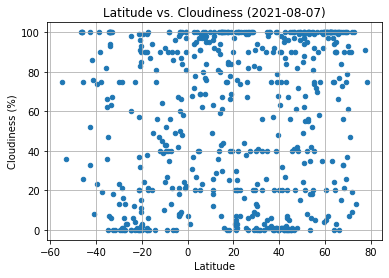

In [9]:
# Plot the scatter plot that shows the relation between latitude and cloudiness, and include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Latitude vs. Cloudiness ({today})')
plt.grid()
plt.savefig('output_data/Latitude_Cloudiness_Plot.png')

The cities with latitude 40 to 80 tends to have a cloudiness clustering at 80% to 100%. However, the rest of the data points seem to distributed evenly on the plot. Hence, there isn't much of a correlation between coludiness and latitude. 

## Latitude vs. Wind Speed Plot

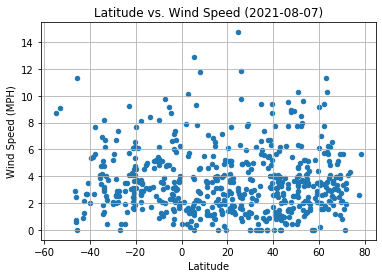

In [10]:
# Plot the scatter plot that shows the relation between latitude and wind speed, and include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title=f'Latitude vs. Wind Speed ({today})')
plt.grid()
plt.savefig('output_data/Latitude_WindSpeed_Plot.png')

Most of the cities has a wind speed of 0MPH to 8MPH, with some cities at a higher(positive and negative) latitude having higher wind speed.

## Linear Regression

In [11]:
# Split the dataframe into two based on the latitude
north_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] >= 0]
south_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.4419282656799652
The linear regression model is y = -0.27x + 33.29


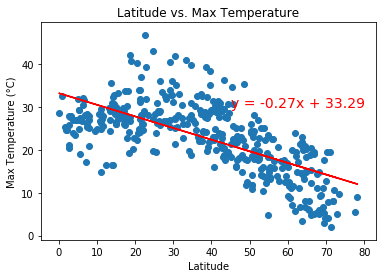

In [12]:
# Plot the linear regression model between latitude and max temperature in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Max Temperature (°C)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the max temperature decreases while the city is away from 0 degree latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.6512724590525903
The linear regression model is y = 0.47x + 29.53


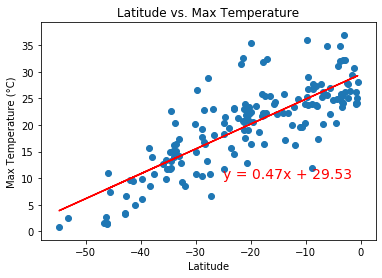

In [13]:
# Plot the linear regression model between latitude and max temperature in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Max Temperature (°C)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the max temperature increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.000522210535845891
The linear regression model is y = 0.03x + 67.58


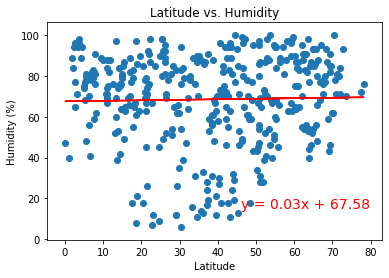

In [14]:
# Plot the linear regression model between latitude and humidity in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the humidity increases while the city is away from 0 degree latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0072746940429605535
The linear regression model is y = -0.14x + 63.55


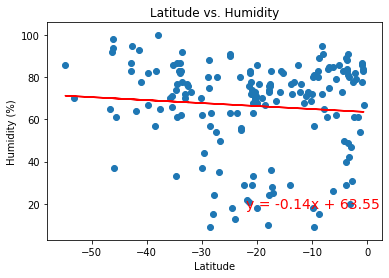

In [15]:
# Plot the linear regression model between latitude and humidity in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the humidity slightly increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0036528753562544776
The linear regression model is y = 0.11x + 54.93


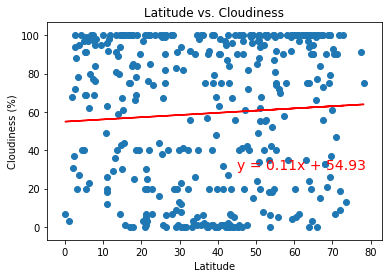

In [16]:
# Plot the linear regression model between latitude and cloudiness in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the cloudiness tend to increase while the city is away from 0 degree latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0003381650524498351
The linear regression model is y = -0.05x + 47.58


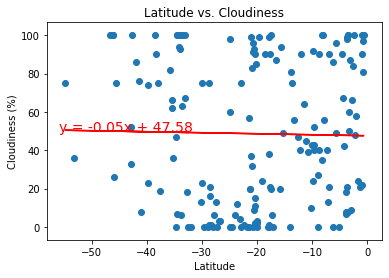

In [17]:
# Plot the linear regression model between latitude and cloudiness in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the cloudiness tend to increases while the city is close to 0 degree latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.0031697912019740845
The linear regression model is y = 0.01x + 3.22


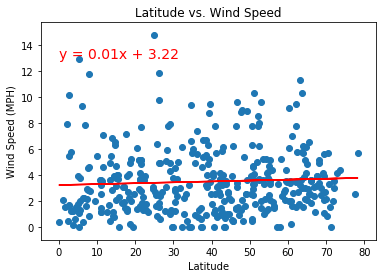

In [18]:
# Plot the linear regression model between latitude and wind speed in the northern hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the northern hemisphere, the wind speed is not really affected while the city is away from 0 degree latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 7.366265722245018e-05
The linear regression model is y = 0.0x + 3.86


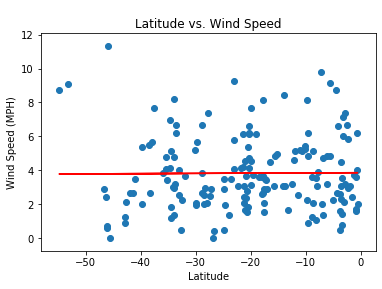

In [19]:
# Plot the linear regression model between latitude and wind speed in the southern hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

In the southern hemisphere, the wind speed is not really affected(even have a slightly steeper slope) while the city is close to 0 degree latitude.